# Premier League 2019-2020 Analysis

## by frankimi

Data from:

https://raw.githubusercontent.com/openfootball/england/master/2019-20/1-premierleague.txt

In [2]:
# imports

import requests
import pandas as pd
import matplotlib.pyplot as plt

In [3]:

# open online txt file and read data

target_url='https://raw.githubusercontent.com/openfootball/england/master/2019-20/1-premierleague.txt'
r = requests.get(target_url)

data = r.text
data = str(data).split('\n')

data = data[3:] # Ignore the first 3 lines

In [13]:
# Sample data

data[430:450]

['[Mon Feb/24]',
 '  FC Liverpool            3-2 West Ham United',
 '  ',
 '  ',
 'Matchday 28',
 '[Fri Feb/28]',
 '  Norwich City            1-0 Leicester City',
 '[Sat Feb/29]',
 '  Aston Villa             - Sheffield United                # Termin verschoben',
 '  Newcastle United        0-0 FC Burnley',
 '  West Ham United         3-1 FC Southampton',
 '  FC Watford              3-0 FC Liverpool',
 '  AFC Bournemouth         2-2 FC Chelsea',
 '  Brighton & Hove Albion  0-1 Crystal Palace',
 '[Sun Mar/1]',
 '  FC Everton              1-1 Manchester United',
 '  Manchester City         - FC Arsenal                      # 11.3.',
 '  Tottenham Hotspur       2-3 Wolverhampton Wanderers',
 ' ',
 '']

In [56]:
# set up dataframe
results_df = pd.DataFrame(columns = ['Home','Home Score','Away Score','Away','Round','Date','Day of Week'])
results_df

,Home,Home Score,Away Score,Away,Round,Date,Day of Week


In [57]:
# load data into dataframe

i = 0
for line in data:
    
    # Deal with exceptions
    if '#' and 'Matchday' in line:
        line = line.replace('#','')
    elif '# ' in line:
        line = line.split('#')[0]
    line = line.strip()
    
    # Get Nth round
    if 'Matchday' in line:
        #print(line)
        current_round = int(line.split(' ')[1])
    
    # Get date and day of week
    if '[' in line:
        string = line[1:-1].split(' ')
        day_of_week = string[0]
        date = string[1]
        
    # Get game result
    if '-' in line:
        if ' - ' not in line:
            string = line.split('-')
        
            home,away = string[0],string[1]

            home = home.rsplit(' ', 1)
            home_team = home[0].strip()
            home_score = int(home[1].strip())

            away = away.split(' ', 1)
            away_team = away[1].strip()
            away_score = int(away[0].strip())
        
            results_df.loc[i] = [home_team ,home_score, away_score, away_team, current_round, date, day_of_week]
            
        else:
            string = line.split('-')
        
            home,away = string[0],string[1]
            home_team = home.strip()
            away_team = away.strip()
        
            results_df.loc[i] = [home_team ,None, None, away_team, current_round, date, day_of_week]
            
        i += 1
        


In [60]:
# result correction for a specific game
results_df['Home Score'][5] = 1
results_df['Away Score'][5] = 1



results_df

,Home,Home Score,Away Score,Away,Round,Date,Day of Week
0,FC Liverpool,4,1,Norwich City,1,Aug/9,Fri
1,West Ham United,0,5,Manchester City,1,Aug/10,Sat
2,Crystal Palace,0,0,FC Everton,1,Aug/10,Sat
3,FC Watford,0,3,Brighton & Hove Albion,1,Aug/10,Sat
4,FC Burnley,3,0,FC Southampton,1,Aug/10,Sat
5,AFC Bournemouth,1,1,Sheffield United,1,Aug/10,Sat
6,Tottenham Hotspur,3,1,Aston Villa,1,Aug/10,Sat
7,Newcastle United,0,1,FC Arsenal,1,Aug/11,Sun
8,Manchester United,4,0,FC Chelsea,1,Aug/11,Sun
9,Leicester City,0,0,Wolverhampton Wanderers,1,Aug/11,Sun


In [59]:
a = 10*27
results_df.iloc[a:a+10, :]

,Home,Home Score,Away Score,Away,Round,Date,Day of Week
270,FC Liverpool,3,2,West Ham United,27,Feb/24,Mon
271,Norwich City,1,0,Leicester City,28,Feb/28,Fri
272,Aston Villa,None,None,Sheffield United,28,Feb/29,Sat
273,Newcastle United,0,0,FC Burnley,28,Feb/29,Sat
274,West Ham United,3,1,FC Southampton,28,Feb/29,Sat
275,FC Watford,3,0,FC Liverpool,28,Feb/29,Sat
276,AFC Bournemouth,2,2,FC Chelsea,28,Feb/29,Sat
277,Brighton & Hove Albion,0,1,Crystal Palace,28,Feb/29,Sat
278,FC Everton,1,1,Manchester United,28,Mar/1,Sun
279,Manchester City,None,None,FC Arsenal,28,Mar/1,Sun


## Nth Round

In [61]:
n = 5

results_df[results_df['Round'] == n]

,Home,Home Score,Away Score,Away,Round,Date,Day of Week
40,FC Liverpool,3,1,Newcastle United,5,Sep/14,Sat
41,Manchester United,1,0,Leicester City,5,Sep/14,Sat
42,Tottenham Hotspur,4,0,Crystal Palace,5,Sep/14,Sat
43,Wolverhampton Wanderers,2,5,FC Chelsea,5,Sep/14,Sat
44,Sheffield United,0,1,FC Southampton,5,Sep/14,Sat
45,Norwich City,3,2,Manchester City,5,Sep/14,Sat
46,Brighton & Hove Albion,1,1,FC Burnley,5,Sep/14,Sat
47,AFC Bournemouth,3,1,FC Everton,5,Sep/15,Sun
48,FC Watford,2,2,FC Arsenal,5,Sep/15,Sun
49,Aston Villa,0,0,West Ham United,5,Sep/16,Mon


## Fixtures for the selected team

In [62]:
selected_team = 'FC Chelsea'

results_df[(results_df['Home'] == selected_team) | (results_df['Away'] == selected_team)]

,Home,Home Score,Away Score,Away,Round,Date,Day of Week
8,Manchester United,4,0,FC Chelsea,1,Aug/11,Sun
17,FC Chelsea,1,1,Leicester City,2,Aug/18,Sun
25,Norwich City,2,3,FC Chelsea,3,Aug/24,Sat
30,FC Chelsea,2,2,Sheffield United,4,Aug/31,Sat
43,Wolverhampton Wanderers,2,5,FC Chelsea,5,Sep/14,Sat
58,FC Chelsea,1,2,FC Liverpool,6,Sep/22,Sun
61,FC Chelsea,2,0,Brighton & Hove Albion,7,Sep/28,Sat
77,FC Southampton,1,4,FC Chelsea,8,Oct/6,Sun
81,FC Chelsea,1,0,Newcastle United,9,Oct/19,Sat
94,FC Burnley,2,4,FC Chelsea,10,Oct/26,Sat


###  Convert date to date time type

In [96]:
months = {
        'Jan' : 1,
        'Feb' : 2,
        'Mar' : 3,
        'Apr' : 4,
        'May' : 5,
        'Jun' : 6,
        'Jul' : 7,
        'Aug' : 8,
        'Sep' : 9, 
        'Oct' : 10,
        'Nov' : 11,
        'Dec' : 12
}



results_df['Date'] = pd.to_datetime(results_df['Date'].apply(
                                            lambda x: ('2019' if months[x.split('/')[0]] >= 8 else '2020')
                                                       + '-'
                                                       + str(months[x.split('/')[0]]) 
                                                       + '-' 
                                                       + x.split('/')[1])
                                                             )

In [97]:
selected_team = 'FC Chelsea'

results_df[(results_df['Home'] == selected_team) | (results_df['Away'] == selected_team)]

,Home,Home Score,Away Score,Away,Round,Date,Day of Week
8,Manchester United,4,0,FC Chelsea,1,2019-08-11,Sun
17,FC Chelsea,1,1,Leicester City,2,2019-08-18,Sun
25,Norwich City,2,3,FC Chelsea,3,2019-08-24,Sat
30,FC Chelsea,2,2,Sheffield United,4,2019-08-31,Sat
43,Wolverhampton Wanderers,2,5,FC Chelsea,5,2019-09-14,Sat
58,FC Chelsea,1,2,FC Liverpool,6,2019-09-22,Sun
61,FC Chelsea,2,0,Brighton & Hove Albion,7,2019-09-28,Sat
77,FC Southampton,1,4,FC Chelsea,8,2019-10-06,Sun
81,FC Chelsea,1,0,Newcastle United,9,2019-10-19,Sat
94,FC Burnley,2,4,FC Chelsea,10,2019-10-26,Sat


## Standings 

In [98]:
# set up standings 
standings_df = pd.DataFrame(columns = ['Rank',
                                       'Team',
                                       'Points',
                                       'Win',
                                       'Draw',
                                       'Lose',
                                       'Goals For',
                                       'Goals Against',
                                       'Goal Difference'])
teams = pd.Series(results_df['Home'].unique()).sort_values()
standings_df['Team'] = teams

standings_df = standings_df.set_index('Team')

for team in teams:
    standings_df.loc[team] = [0] * 8

# standings_df


In [99]:
standings_df

,Rank,Points,Win,Draw,Lose,Goals For,Goals Against,Goal Difference
Team,,,,,,,,
AFC Bournemouth,0,0,0,0,0,0,0,0
Aston Villa,0,0,0,0,0,0,0,0
Brighton & Hove Albion,0,0,0,0,0,0,0,0
Crystal Palace,0,0,0,0,0,0,0,0
FC Arsenal,0,0,0,0,0,0,0,0
FC Burnley,0,0,0,0,0,0,0,0
FC Chelsea,0,0,0,0,0,0,0,0
FC Everton,0,0,0,0,0,0,0,0
FC Liverpool,0,0,0,0,0,0,0,0


In [100]:
for index, row in results_df.iterrows():
    if row['Home Score'] == None:
        break
    else:
        home_team = results_df.loc[index]['Home']
        away_team = results_df.loc[index]['Away']
        
        # Goals
        standings_df['Goals For'][home_team] += results_df.loc[index]['Home Score']
        standings_df['Goals Against'][home_team] += results_df.loc[index]['Away Score']
        
        standings_df['Goals For'][away_team] += results_df.loc[index]['Away Score']
        standings_df['Goals Against'][away_team] += results_df.loc[index]['Home Score']
        
        
        # Points and WDL
        if row['Home Score'] > row['Away Score']:
            standings_df['Points'][home_team] += 3
            
            standings_df['Win'][home_team] += 1
            standings_df['Lose'][away_team] += 1
            
        elif row['Home Score'] == row['Away Score']:
            standings_df['Points'][home_team] += 1
            standings_df['Points'][away_team] += 1
            
            standings_df['Draw'][home_team] += 1
            standings_df['Draw'][away_team] += 1
        else:
            standings_df['Points'][away_team] += 3
            
            standings_df['Lose'][home_team] += 1
            standings_df['Win'][away_team] += 1
            
standings_df['Goal Difference'] = standings_df['Goals For'] - standings_df['Goals Against']
standings_df = standings_df.sort_values(by=['Points','Goal Difference','Goals For'], ascending=False)
standings_df['Rank'] = range(1,21)

standings_df

,Rank,Points,Win,Draw,Lose,Goals For,Goals Against,Goal Difference
Team,,,,,,,,
FC Liverpool,1,82,27,1,0,66,17,49
Manchester City,2,57,18,3,6,68,29,39
Leicester City,3,50,15,5,8,54,28,26
FC Chelsea,4,44,13,5,9,45,37,8
Manchester United,5,41,11,8,8,41,29,12
Tottenham Hotspur,6,40,11,7,9,44,36,8
Sheffield United,7,40,10,10,7,29,25,4
Wolverhampton Wanderers,8,39,9,12,6,38,32,6
FC Arsenal,9,37,8,13,6,39,36,3


In [101]:
def rank_change(the_team):
    

    place_list = []
    # set up team standings table
    team_standings_df = pd.DataFrame(columns = ['Rank','Team','Points','Win','Draw','Lose','Goals For','Goals Against','Goal Difference'])
    teams = pd.Series(results_df['Home'].unique()).sort_values()
    team_standings_df['Team'] = teams

    team_standings_df = team_standings_df.set_index('Team')

    for team in teams:
        team_standings_df.loc[team] = [0] * 8

    # Calculate rank after each round 
    this_round = 1    
    for index, row in results_df.iterrows():
        if row['Home Score'] == None:
            break
        else:
            home_team = results_df.loc[index]['Home']
            away_team = results_df.loc[index]['Away']
            current_round = results_df.loc[index]['Round']
            
            if current_round > this_round:
                place = team_standings_df['Rank'][the_team]
                this_round = current_round
                place_list.append(place)

            # Goals
            team_standings_df['Goals For'][home_team] += results_df.loc[index]['Home Score']
            team_standings_df['Goals Against'][home_team] += results_df.loc[index]['Away Score']

            team_standings_df['Goals For'][away_team] += results_df.loc[index]['Away Score']
            team_standings_df['Goals Against'][away_team] += results_df.loc[index]['Home Score']


            # Points and WDL
            if row['Home Score'] > row['Away Score']:
                team_standings_df['Points'][home_team] += 3

                team_standings_df['Win'][home_team] += 1
                team_standings_df['Lose'][away_team] += 1

            elif row['Home Score'] == row['Away Score']:
                team_standings_df['Points'][home_team] += 1
                team_standings_df['Points'][away_team] += 1

                team_standings_df['Draw'][home_team] += 1
                team_standings_df['Draw'][away_team] += 1
            else:
                team_standings_df['Points'][away_team] += 3

                team_standings_df['Lose'][home_team] += 1
                team_standings_df['Win'][away_team] += 1

            team_standings_df['Goal Difference'] = team_standings_df['Goals For'] - team_standings_df['Goals Against']
            team_standings_df = team_standings_df.sort_values(by=['Points','Goal Difference','Goals For'], ascending=False)
            team_standings_df['Rank'] = range(1,21)

        
    place = team_standings_df['Rank'][the_team]
    place_list.append(place)

    x = range(1, len(place_list)+1)
    
    font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }
    font2 = {'family': 'serif',
        'color':  'darkblue',
        'weight': 'normal',
        'size': 16,
        }
    
    plt.figure(figsize=(15,8))
    
    plt.scatter(x,place_list)
    plt.plot(x, place_list)
    plt.title(f'{the_team} Ranking',fontdict = font)
    plt.xlabel('Round',fontdict = font)
    plt.ylabel('Rank',fontdict = font)
    plt.ylim(ymin = 1, ymax = 20) 
    plt.gca().invert_yaxis()
    plt.xticks(x)
    plt.yticks([])

    for a,b in zip(x, place_list): 
        plt.text(a, b, str(b),fontdict = font2)

    plt.show() 

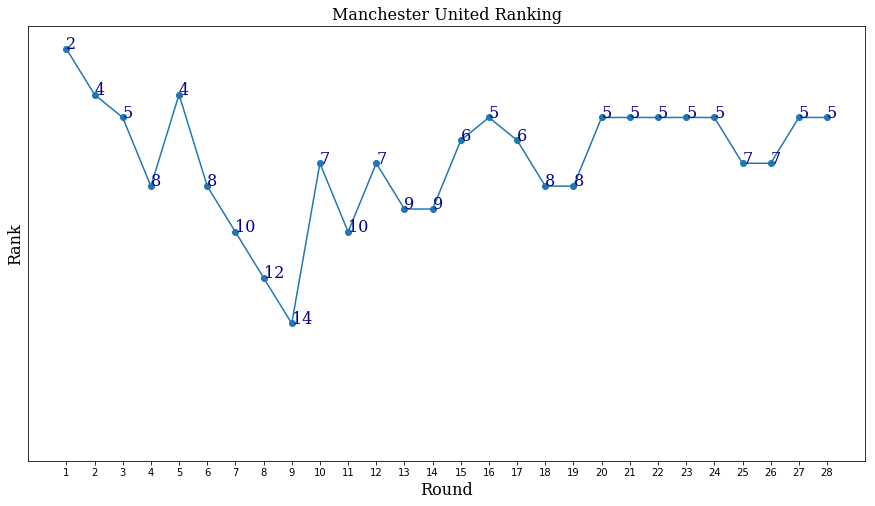

In [102]:
select_team1 = 'Manchester United'
rank_change(select_team1)

In [103]:
def teams_rank_change(*args):
    
    teams_selected = list(args)

    teams = pd.Series(results_df['Home'].unique()).sort_values()
    teams_rank = {}
    for team in teams:
        teams_rank[team] = []
        
    # set up team standings table
    team_standings_df = pd.DataFrame(columns = ['Rank','Team','Points','Win','Draw','Lose','Goals For','Goals Against','Goal Difference'])
    teams = pd.Series(results_df['Home'].unique()).sort_values()
    team_standings_df['Team'] = teams

    team_standings_df = team_standings_df.set_index('Team')

    for team in teams:
        team_standings_df.loc[team] = [0] * 8

    # Calculate rank after each round 
    this_round = 1    
    for index, row in results_df.iterrows():
        if row['Home Score'] == None:
            break
        else:
            home_team = results_df.loc[index]['Home']
            away_team = results_df.loc[index]['Away']
            current_round = results_df.loc[index]['Round']
            
            if current_round > this_round:
                for team in teams:
                    place = team_standings_df['Rank'][team]
                    teams_rank[team].append(place)
                    this_round = current_round
                
            # Goals
            team_standings_df['Goals For'][home_team] += results_df.loc[index]['Home Score']
            team_standings_df['Goals Against'][home_team] += results_df.loc[index]['Away Score']

            team_standings_df['Goals For'][away_team] += results_df.loc[index]['Away Score']
            team_standings_df['Goals Against'][away_team] += results_df.loc[index]['Home Score']


            # Points and WDL
            if row['Home Score'] > row['Away Score']:
                team_standings_df['Points'][home_team] += 3

                team_standings_df['Win'][home_team] += 1
                team_standings_df['Lose'][away_team] += 1

            elif row['Home Score'] == row['Away Score']:
                team_standings_df['Points'][home_team] += 1
                team_standings_df['Points'][away_team] += 1

                team_standings_df['Draw'][home_team] += 1
                team_standings_df['Draw'][away_team] += 1
            else:
                team_standings_df['Points'][away_team] += 3

                team_standings_df['Lose'][home_team] += 1
                team_standings_df['Win'][away_team] += 1

            team_standings_df['Goal Difference'] = team_standings_df['Goals For'] - team_standings_df['Goals Against']
            team_standings_df = team_standings_df.sort_values(by=['Points','Goal Difference','Goals For'], ascending=False)
            team_standings_df['Rank'] = range(1,21)

        
  

    
    
    font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }
    font2 = {'family': 'serif',
        'color':  'darkblue',
        'weight': 'normal',
        'size': 10,
        }
    
    plt.figure(figsize=(15,8))
    for team in teams_selected:
        
        place_list = teams_rank[team]
        x = range(1, len(place_list)+1)
        plt.scatter(x,place_list)
        plt.plot(x, place_list)
        
#         for a,b in zip(x, place_list): 
#             plt.text(a, b, str(b),fontdict = font2)

    plt.grid(which='major', linestyle='-', linewidth='0.2', color='grey')
    plt.title('Selected Teams Ranking',fontdict = font)
    plt.xlabel('Round',fontdict = font)
    plt.ylabel('Rank',fontdict = font)
    plt.ylim(ymin = -1, ymax = 22) 
    plt.gca().legend(teams_selected)
    plt.gca().invert_yaxis()
    plt.xticks(x)
    plt.yticks(range(1,21))


    
    plt.show() 

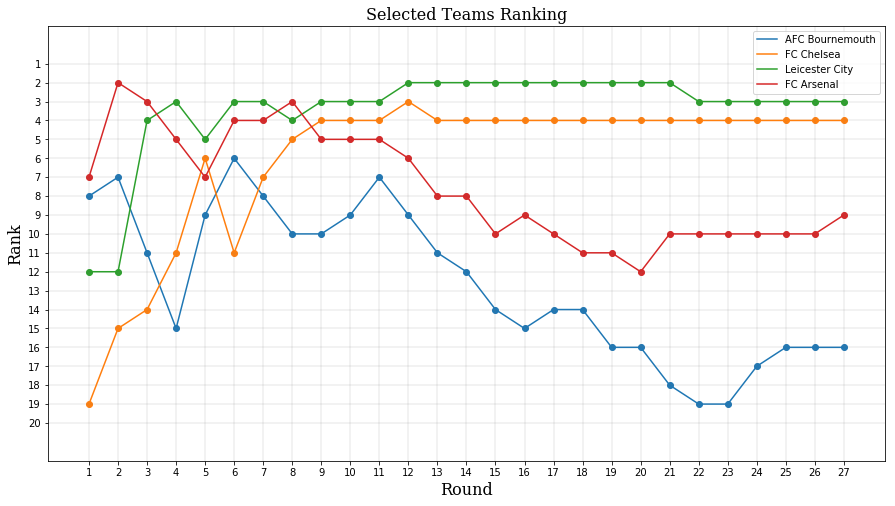

In [104]:
teams_rank_change('AFC Bournemouth','FC Chelsea','Leicester City','FC Arsenal')